In [1]:
import pandas as pd
import pickle
from PIL import Image
import numpy as np
import os
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import shelve
import math
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import pickle5 as pickle
import scipy.io
from scipy.stats import sem
import dataframe_image as dfi

In [2]:
## model rdms - KDEF_B - note that these are named RDM A in the paper
ResNet_SUP = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/RDM_value_B.pkl',"rb"))
ResNet_UNSUP = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/RDM_value_B.pkl',"rb"))
ResNet_RL = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_RDM_value_B.pkl',"rb"))
VIB_SUP = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/RDM_value_B.pkl',"rb"))
VIB_UNSUP = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/RDM_value_B.pkl',"rb"))
VIB_RL = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/RDM_value_B.pkl',"rb"))
model_rdm = np.squeeze(np.array ([[ResNet_SUP],[ResNet_UNSUP],[ResNet_RL],[VIB_SUP],[VIB_UNSUP],[VIB_RL]]), axis = 1)
# model_rdm.shape
v_model_rdms_vB = []
for i in range(model_rdm.shape[0]):
    current_model_rdm = model_rdm[i, :, :]
    flattened_model_rdm = current_model_rdm[np.triu_indices(current_model_rdm.shape[0], 1)]
    v_model_rdms_vB.append(flattened_model_rdm) 
v_model_rdms_vB = np.array(v_model_rdms_vB)
# v_model_rdms_vB.shape = (6, 19900) - each row corresponds to a flattened RDM of one model

## model rdms - KDEF_A - note that these are named RDM B in the paper
ResNet_SUP = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/RDM_value_A.pkl',"rb"))
ResNet_UNSUP = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/RDM_value_A.pkl',"rb"))
ResNet_RL = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_RDM_value_A.pkl',"rb"))
VIB_SUP = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/RDM_value_A.pkl',"rb"))
VIB_UNSUP = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/RDM_value_A.pkl',"rb"))
VIB_RL = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/RDM_value_A.pkl',"rb"))
model_rdm = np.squeeze(np.array ([[ResNet_SUP],[ResNet_UNSUP],[ResNet_RL],[VIB_SUP],[VIB_UNSUP],[VIB_RL]]), axis = 1)
# model_rdm.shape
v_model_rdms_vA = []
for i in range(model_rdm.shape[0]):
    current_model_rdm = model_rdm[i, :, :]
    flattened_model_rdm = current_model_rdm[np.triu_indices(current_model_rdm.shape[0], 1)]
    v_model_rdms_vA.append(flattened_model_rdm) 
v_model_rdms_vA = np.array(v_model_rdms_vA)
# v_model_rdms_vA.shape = (6, 179700) - each row corresponds to a flattened RDM of one model

In [3]:
## brain rdms version B
brain_rdm = np.array ([[[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e10_wind4.mat').get("disMatwind"),  # time window 4
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e10_wind5.mat').get("disMatwind"),  # time window 5
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e10_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                      [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e11_wind4.mat').get("disMatwind"),  # time window 4
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e11_wind5.mat').get("disMatwind"),  # time window 5
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e11_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                      [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e12_wind4.mat').get("disMatwind"),  # time window 4
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e12_wind5.mat').get("disMatwind"),  # time window 5
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e12_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                      [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e2_wind4.mat').get("disMatwind"),  # time window 4
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e2_wind5.mat').get("disMatwind"),  # time window 5
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e2_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                      [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e24_wind4.mat').get("disMatwind"),  # time window 4
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e24_wind5.mat').get("disMatwind"),  # time window 5
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e24_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                      [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e9_wind4.mat').get("disMatwind"),  # time window 4
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e9_wind5.mat').get("disMatwind"),  # time window 5
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p41_e9_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                      [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p47_e34_wind4.mat').get("disMatwind"),  # time window 4
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p47_e34_wind5.mat').get("disMatwind"),  # time window 5
                        scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vB/face_selective/p47_e34_wind6.mat').get("disMatwind")   # time window 6
                         ]]])
# brain_rdm.shape = (7, 1, 3, 200, 200)
brain_rdm_vB = np.squeeze(brain_rdm, axis = 1)
# brain_rdm_vB.shape = (7, 3, 200, 200)
averaged_brain_rdms = np.mean(brain_rdm_vB, axis = 0)  ##averaging across electrode
# averaged_brain_rdms.shape = (3, 200, 200)

v_brain_rdms_vB = []
for i in range(3): ## three time window
    upper_triangle = averaged_brain_rdms[i][np.triu_indices(200, 1)]
    v_brain_rdms_vB.append(upper_triangle)
v_brain_rdms_vB = np.array(v_brain_rdms_vB)
# v_brain_rdms_vB.shape = (3, 19900) - each row corresponds to a flattened brain RDM for a time window

brain_rdm_vA = np.array ([[[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p16_e90_wind4.mat').get("disMatwind"),  # time window 4
                         scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p16_e90_wind5.mat').get("disMatwind"),  # time window 5
                         scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p16_e90_wind6.mat').get("disMatwind")   # time window 6],
                          ]], 
                         [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p23_wind4.mat').get("disMatwind"),  # time window 4
                         scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p23_wind5.mat').get("disMatwind"),  # time window 5
                         scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p23_wind6.mat').get("disMatwind")   # time window 6],
                          ]], 
                         [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e100_wind4.mat').get("disMatwind"),  # time window 4
                         scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e100_wind5.mat').get("disMatwind"),  # time window 5
                         scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e100_wind6.mat').get("disMatwind")   # time window 6], 
                         ]], 
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e53_wind4.mat').get("disMatwind"),  # time window 4
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e53_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e53_wind6.mat').get("disMatwind")   # time window 6
                         ]], 
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e60_wind4.mat').get("disMatwind"),  # time window 4
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e60_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e60_wind6.mat').get("disMatwind")   # time window 6
                         ]], 
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e61_wind4.mat').get("disMatwind"),  # time window 4
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e61_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e61_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e62_wind4.mat').get("disMatwind"),  # time window 4
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e62_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p27_e62_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p28_e85_wind4.mat').get("disMatwind"),  # time window 4
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p28_e85_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p28_e85_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p30_e8_wind4.mat').get("disMatwind"),  # time window 4 
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p30_e8_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p30_e8_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p34_e23_wind4.mat').get("disMatwind"),  # time window 4
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p34_e23_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p34_e23_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p34_e42_wind4.mat').get("disMatwind"),  # time window 4
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p34_e42_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p34_e42_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p34_e44_wind4.mat').get("disMatwind"),  # time window 4
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p34_e44_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p34_e44_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p43_e43_wind4.mat').get("disMatwind"),  # time window 4
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p43_e43_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p43_e43_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p36_e64_wind4.mat').get("disMatwind"),  # time window 4
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p36_e64_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p36_e64_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p36_e69_wind4.mat').get("disMatwind"),  # time window 4
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p36_e69_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p36_e69_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p36_e70_wind4.mat').get("disMatwind"),  # time window 4
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p36_e70_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p36_e70_wind6.mat').get("disMatwind")   # time window 6
                         ]],
                        [[scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p39_wind4.mat').get("disMatwind"),  # time window 4
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p39_wind5.mat').get("disMatwind"),  # time window 5
                          scipy.io.loadmat('/mmfs1/data/zhouabx/iEEG_rdms/data/vA/face_selective/p39_wind6.mat').get("disMatwind")   # time window 6
                         ]]])
brain_rdm_vA = np.squeeze(brain_rdm_vA, axis = 1)
# v_brain_rdms_vA.shape = (3, 179700)

In [4]:
v_brain_rdm_vA = []
for electrode in range(brain_rdm_vA.shape[0]):
    for time_window in range(brain_rdm_vA.shape[1]):
        upper_triangular = brain_rdm_vA[electrode, time_window][np.triu_indices(600, k = 1)]
        v_brain_rdm_vA.append(upper_triangular)
v_brain_rdm_vA = np.array(v_brain_rdm_vA)
v_brain_rdm_vA.shape ## (51, 179700)

(51, 179700)

In [5]:
v_brain_rdm_vB = []
for electrode in range(brain_rdm_vB.shape[0]):
    for time_window in range(brain_rdm_vB.shape[1]):
        upper_triangular = brain_rdm_vB[electrode, time_window][np.triu_indices(200, k = 1)]
        v_brain_rdm_vB.append(upper_triangular)
v_brain_rdm_vB = np.array(v_brain_rdm_vB)
v_brain_rdm_vB.shape ## (21, 19900)

(21, 19900)

In [6]:
from sklearn.linear_model import LinearRegression
from scipy.stats import kendalltau
import numpy as np

ResNet_SUP_vA = v_model_rdms_vA[0]
ResNet_UNSUP_vA = v_model_rdms_vA[1]
ResNet_RL_vA = v_model_rdms_vA[2]
VIB_SUP_vA = v_model_rdms_vA[3]
VIB_UNSUP_vA = v_model_rdms_vA[4]
VIB_RL_vA = v_model_rdms_vA[5]

## Regress ResNet_SUP on ResNet_UNSUP y = ResNet_SUP, x = ResNet_UNSUP
reg = LinearRegression().fit(ResNet_UNSUP_vA.reshape(-1, 1), ResNet_SUP_vA)
residuals = ResNet_SUP_vA - reg.predict(ResNet_UNSUP_vA.reshape(-1, 1))

folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p16/'
vA_p16_rdms = []
v_vA_p16_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path))[1:]:
    # print (data_file)
    vA_p16_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p16_rdms)):
    vector = vA_p16_rdms[i][np.triu_indices(vA_p16_rdms[i].shape[0], 1)]
    v_vA_p16_rdms.append(vector)
    
kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p16 = []
for i in range (len(v_vA_p16_rdms)):   
    kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p16.append(stats.kendalltau(residuals, v_vA_p16_rdms[i]))
    
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p16[0]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p16_e90_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p16[1]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p16_e90_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p16[2]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p16_e90_wind6 kendalltau: %.5f' % corr)

subset A ResNet_SUP_ResNet_UNSUP_residual and p16_e90_wind4 kendalltau: 0.01562
subset A ResNet_SUP_ResNet_UNSUP_residual and p16_e90_wind5 kendalltau: 0.00804
subset A ResNet_SUP_ResNet_UNSUP_residual and p16_e90_wind6 kendalltau: 0.00521


In [7]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p23/'
vA_p23_rdms = []
v_vA_p23_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path)):
    # print (data_file)
    vA_p23_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p23_rdms)):
    vector = vA_p23_rdms[i][np.triu_indices(vA_p23_rdms[i].shape[0], 1)]
    v_vA_p23_rdms.append(vector)
    
kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p23 = []
for i in range (len(v_vA_p23_rdms)):   
    kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p23.append(stats.kendalltau(residuals, v_vA_p23_rdms[i]))

corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p23[0]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p23_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p23[1]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p23_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p23[2]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p23_wind6 kendalltau: %.5f' % corr)

subset A ResNet_SUP_ResNet_UNSUP_residual and p23_wind4 kendalltau: -0.00091
subset A ResNet_SUP_ResNet_UNSUP_residual and p23_wind5 kendalltau: -0.00196
subset A ResNet_SUP_ResNet_UNSUP_residual and p23_wind6 kendalltau: -0.00003


In [8]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p27/'
vA_p27_rdms = []
v_vA_p27_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path)):
    # print (data_file)
    vA_p27_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p27_rdms)):
    vector = vA_p27_rdms[i][np.triu_indices(vA_p27_rdms[i].shape[0], 1)]
    v_vA_p27_rdms.append(vector)
    
kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27 = []
for i in range (len(v_vA_p27_rdms)):   
    kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27.append(stats.kendalltau(residuals, v_vA_p27_rdms[i]))

corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[0]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e100_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[1]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e100_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[2]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e100_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[3]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e53_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[4]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e53_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[5]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e53_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[6]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e60_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[7]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e60_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[8]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e60_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[9]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e61_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[10]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e61_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[11]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e61_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[12]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e62_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[13]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e62_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[14]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e62_wind6 kendalltau: %.5f' % corr)

subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e100_wind4 kendalltau: 0.03055
subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e100_wind5 kendalltau: 0.02039
subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e100_wind6 kendalltau: 0.00365
subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e53_wind4 kendalltau: 0.02900
subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e53_wind5 kendalltau: 0.04890
subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e53_wind6 kendalltau: 0.03081
subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e60_wind4 kendalltau: 0.00596
subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e60_wind5 kendalltau: 0.02042
subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e60_wind6 kendalltau: 0.01020
subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e61_wind4 kendalltau: 0.00936
subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e61_wind5 kendalltau: 0.02677
subset A ResNet_SUP_ResNet_UNSUP_residual and p27_e61_wind6 kendalltau: 0.01875
subset A ResNet_SUP_ResNet_UNSUP_resi

In [9]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p28/'
vA_p28_rdms = []
v_vA_p28_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path))[1:]:
    # print (data_file)
    vA_p28_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p28_rdms)):
    vector = vA_p28_rdms[i][np.triu_indices(vA_p28_rdms[i].shape[0], 1)]
    v_vA_p28_rdms.append(vector)
    
kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p28 = []
for i in range (len(v_vA_p28_rdms)):   
    kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p28.append(stats.kendalltau(residuals, v_vA_p28_rdms[i]))

corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p28[0]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p28_e85_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p28[1]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p28_e85_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p28[2]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p28_e85_wind6 kendalltau: %.5f' % corr)

subset A ResNet_SUP_ResNet_UNSUP_residual and p28_e85_wind4 kendalltau: 0.02514
subset A ResNet_SUP_ResNet_UNSUP_residual and p28_e85_wind5 kendalltau: 0.00408
subset A ResNet_SUP_ResNet_UNSUP_residual and p28_e85_wind6 kendalltau: 0.00394


In [10]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p30/'
vA_p30_rdms = []
v_vA_p30_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path)):
    # print (data_file)
    vA_p30_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p30_rdms)):
    vector = vA_p30_rdms[i][np.triu_indices(vA_p30_rdms[i].shape[0], 1)]
    v_vA_p30_rdms.append(vector)
    
kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p30 = []
for i in range (len(v_vA_p30_rdms)):   
    kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p30.append(stats.kendalltau(residuals, v_vA_p30_rdms[i]))

corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p30[0]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p30_e8_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p30[1]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p30_e8_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p30[2]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p30_e8_wind6 kendalltau: %.5f' % corr)

subset A ResNet_SUP_ResNet_UNSUP_residual and p30_e8_wind4 kendalltau: 0.00041
subset A ResNet_SUP_ResNet_UNSUP_residual and p30_e8_wind5 kendalltau: 0.00275
subset A ResNet_SUP_ResNet_UNSUP_residual and p30_e8_wind6 kendalltau: 0.00249


In [11]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p34/'
vA_p34_rdms = []
v_vA_p34_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path)):
    # print (data_file)
    vA_p34_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p34_rdms)):
    vector = vA_p34_rdms[i][np.triu_indices(vA_p34_rdms[i].shape[0], 1)]
    v_vA_p34_rdms.append(vector)
    
kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34 = []
for i in range (len(v_vA_p34_rdms)):   
    kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34.append(stats.kendalltau(residuals, v_vA_p34_rdms[i]))

corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[0]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e23_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[1]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e23_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[2]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e23_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[3]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e42_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[4]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e42_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[5]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e42_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[6]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e44_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[7]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e44_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[8]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e44_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[9]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p43_e43_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[10]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p43_e43_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[11]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p43_e43_wind6 kendalltau: %.5f' % corr)

subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e23_wind4 kendalltau: 0.00100
subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e23_wind5 kendalltau: 0.00195
subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e23_wind6 kendalltau: 0.00005
subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e42_wind4 kendalltau: 0.00620
subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e42_wind5 kendalltau: 0.00513
subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e42_wind6 kendalltau: 0.00134
subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e44_wind4 kendalltau: 0.01743
subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e44_wind5 kendalltau: 0.00863
subset A ResNet_SUP_ResNet_UNSUP_residual and p34_e44_wind6 kendalltau: -0.00002
subset A ResNet_SUP_ResNet_UNSUP_residual and p43_e43_wind4 kendalltau: 0.05703
subset A ResNet_SUP_ResNet_UNSUP_residual and p43_e43_wind5 kendalltau: 0.02505
subset A ResNet_SUP_ResNet_UNSUP_residual and p43_e43_wind6 kendalltau: -0.00051


In [12]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p36/'
vA_p36_rdms = []
v_vA_p36_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path))[1:]:
    # print (data_file)
    vA_p36_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p36_rdms)):
    vector = vA_p36_rdms[i][np.triu_indices(vA_p36_rdms[i].shape[0], 1)]
    v_vA_p36_rdms.append(vector)
    
kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36 = []
for i in range (len(v_vA_p36_rdms)):   
    kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36.append(stats.kendalltau(residuals, v_vA_p36_rdms[i]))

corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[0]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e64_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[1]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e64_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[2]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e64_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[3]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e69_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[4]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e69_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[5]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e69_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[6]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e70_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[7]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e70_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[8]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e70_wind6 kendalltau: %.5f' % corr)

subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e64_wind4 kendalltau: 0.04261
subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e64_wind5 kendalltau: 0.04398
subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e64_wind6 kendalltau: 0.01897
subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e69_wind4 kendalltau: 0.00258
subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e69_wind5 kendalltau: 0.00411
subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e69_wind6 kendalltau: 0.00419
subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e70_wind4 kendalltau: -0.00131
subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e70_wind5 kendalltau: 0.00411
subset A ResNet_SUP_ResNet_UNSUP_residual and p36_e70_wind6 kendalltau: 0.00478


In [13]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p39/'
vA_p39_rdms = []
v_vA_p39_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path)):
    # print (data_file)
    vA_p39_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p39_rdms)):
    vector = vA_p39_rdms[i][np.triu_indices(vA_p39_rdms[i].shape[0], 1)]
    v_vA_p39_rdms.append(vector)
    
kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p39 = []
for i in range (len(v_vA_p39_rdms)):   
    kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p39.append(stats.kendalltau(residuals, v_vA_p39_rdms[i]))

corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p39[0]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p39_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p39[1]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p39_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p39[2]
print('subset A ResNet_SUP_ResNet_UNSUP_residual and p39_wind6 kendalltau: %.5f' % corr)

subset A ResNet_SUP_ResNet_UNSUP_residual and p39_wind4 kendalltau: 0.00009
subset A ResNet_SUP_ResNet_UNSUP_residual and p39_wind5 kendalltau: 0.00009
subset A ResNet_SUP_ResNet_UNSUP_residual and p39_wind6 kendalltau: -0.00097


In [14]:
from sklearn.linear_model import LinearRegression
from scipy.stats import kendalltau
import numpy as np

ResNet_SUP_vB = v_model_rdms_vB[0]
ResNet_UNSUP_vB = v_model_rdms_vB[1]
ResNet_RL_vB = v_model_rdms_vB[2]
VIB_SUP_vB = v_model_rdms_vB[3]
VIB_UNSUP_vB = v_model_rdms_vB[4]
VIB_RL_vB = v_model_rdms_vB[5]

## Regress ResNet_SUP on ResNet_UNSUP y = ResNet_SUP, x = ResNet_UNSUP
reg = LinearRegression().fit(ResNet_UNSUP_vB.reshape(-1, 1), ResNet_SUP_vB)
residuals_vB = ResNet_SUP_vB - reg.predict(ResNet_UNSUP_vB.reshape(-1, 1))

folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vB/p41/'
vB_p41_rdms = []
v_vB_p41_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path))[1:]:
    # print (data_file)
    vB_p41_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vB_p41_rdms)):
    vector = vB_p41_rdms[i][np.triu_indices(vB_p41_rdms[i].shape[0], 1)]
    v_vB_p41_rdms.append(vector)
    
kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41 = []
for i in range (len(v_vB_p41_rdms)):   
    kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41.append(stats.kendalltau(residuals_vB, v_vB_p41_rdms[i]))

corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[1]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e10_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[2]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e10_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[3]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e10_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[7]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e11_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[8]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e11_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[9]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e11_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[13]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e12_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[14]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e12_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[15]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e12_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[19]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e2_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[20]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e2_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[21]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e2_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[25]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e24_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[26]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e24_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[27]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e24_wind6 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[31]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e9_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[32]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e9_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[33]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e9_wind6 kendalltau: %.5f' % corr)

subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e10_wind4 kendalltau: 0.26092
subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e10_wind5 kendalltau: 0.21667
subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e10_wind6 kendalltau: 0.00861
subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e11_wind4 kendalltau: 0.20899
subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e11_wind5 kendalltau: 0.10363
subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e11_wind6 kendalltau: 0.00995
subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e12_wind4 kendalltau: 0.10711
subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e12_wind5 kendalltau: 0.02155
subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e12_wind6 kendalltau: 0.01321
subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e2_wind4 kendalltau: 0.14228
subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e2_wind5 kendalltau: 0.06286
subset B ResNet_SUP_ResNet_UNSUP_residual and p41_e2_wind6 kendalltau: 0.00275
subset B ResNet_SUP_ResNet_UNSUP_residual a

In [15]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vB/fusiform_reliable/p47/'
vB_p47_rdms = []
v_vB_p47_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path))[1:]:
    # print (data_file)
    vB_p47_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vB_p47_rdms)):
    vector = vB_p47_rdms[i][np.triu_indices(vB_p47_rdms[i].shape[0], 1)]
    v_vB_p47_rdms.append(vector)

kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p47 = []
for i in range (len(v_vB_p47_rdms)):   
    kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p47.append(stats.kendalltau(residuals_vB, v_vB_p47_rdms[i]))

corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p47[1]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p47_e34_wind4 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p47[2]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p47_e34_wind5 kendalltau: %.5f' % corr)
corr, _ = kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p47[3]
print('subset B ResNet_SUP_ResNet_UNSUP_residual and p47_e34_wind6 kendalltau: %.5f' % corr)

subset B ResNet_SUP_ResNet_UNSUP_residual and p47_e34_wind4 kendalltau: 0.16093
subset B ResNet_SUP_ResNet_UNSUP_residual and p47_e34_wind5 kendalltau: 0.09848
subset B ResNet_SUP_ResNet_UNSUP_residual and p47_e34_wind6 kendalltau: 0.01093


In [16]:
ResNet_SUP_ResNet_UNSUP_residual_tau_wind4 = np.array([kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p16[0][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p23[0][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[0][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[3][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[6][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[9][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[12][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p28[0][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p30[0][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[0][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[3][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[6][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[9][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[0][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[3][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[6][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p39[0][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[1][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[7][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[13][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[19][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[25][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[31][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p47[1][0]])

ResNet_SUP_ResNet_UNSUP_residual_tau_wind4_mean = np.mean(ResNet_SUP_ResNet_UNSUP_residual_tau_wind4)


ResNet_SUP_ResNet_UNSUP_residual_tau_wind5 = np.array([kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p16[1][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p23[1][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[1][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[4][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[7][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[10][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[13][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p28[1][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p30[1][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[1][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[4][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[7][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[10][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[1][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[4][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[7][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p39[1][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[2][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[8][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[14][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[20][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[26][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[32][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p47[2][0]])

ResNet_SUP_ResNet_UNSUP_residual_tau_wind5_mean = np.mean(ResNet_SUP_ResNet_UNSUP_residual_tau_wind5)

ResNet_SUP_ResNet_UNSUP_residual_tau_wind6 = np.array([kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p16[2][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p23[2][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[2][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[5][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[8][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[11][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p27[14][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p28[2][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p30[2][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[2][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[5][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[8][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p34[11][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[2][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[5][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p36[8][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vA_p39[2][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[3][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[9][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[15][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[21][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[27][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p41[33][0],
                            kendalltau_ResNet_SUP_ResNet_UNSUP_residual_and_vB_p47[3][0]])

ResNet_SUP_ResNet_UNSUP_residual_tau_wind6_mean = np.mean(ResNet_SUP_ResNet_UNSUP_residual_tau_wind6)

In [17]:
def flatten_rdm(rdm):
    upper_tri_indices = np.triu_indices(rdm.shape[0], k = 1)
    return rdm[upper_tri_indices]

def compute_tau(brain_rdms, model_rdms, return_raw_matrix = False):
    num_models = len(model_rdms)
    num_brain_rdms = len(brain_rdms)  
    kendall_tau_matrix = np.zeros((num_models, num_models, num_brain_rdms))

    for model_a in range(num_models):
        for model_b in range(num_models):
            if model_a != model_b:
                model_a_rdm = model_rdms[model_a]
                model_b_rdm = model_rdms[model_b]

                reg = LinearRegression().fit(model_b_rdm.reshape(-1, 1), model_a_rdm)
                residuals = model_a_rdm - reg.predict(model_b_rdm.reshape(-1, 1))

                for i, brain_rdm in enumerate(brain_rdms):
                    tau, _ = kendalltau(residuals, brain_rdm)
                    kendall_tau_matrix[model_a, model_b, i] = tau

    if return_raw_matrix:
        return kendall_tau_matrix
    else:
        return np.mean(kendall_tau_matrix, axis = 2)

In [18]:
# flattening the brain RDMs for vA
flattened_brain_rdms_A = [flatten_rdm(brain_rdm_vA[elec, t]) for t in range(3) for elec in range(17)]
# compute tau values for flattened brain RDMs
raw_tau_matrix_A = compute_tau(flattened_brain_rdms_A, v_model_rdms_vA, return_raw_matrix = True)

# flattening the brain RDMs for vB
flattened_brain_rdms_B = [flatten_rdm(brain_rdm_vB[elec, t]) for t in range(3) for elec in range(7)]
# compute tau values for flattened brain RDMs
raw_tau_matrix_B = compute_tau(flattened_brain_rdms_B, v_model_rdms_vB, return_raw_matrix = True)

combined_avg_tau_matrices = []
for t in range(3):  
    combined_avg_tau = (raw_tau_matrix_A[:, :, t * 17:(t + 1) * 17].sum(axis = 2) + 
                        raw_tau_matrix_B[:, :, t * 7:(t + 1) * 7].sum(axis = 2)) / (17 + 7)     ### total electrode # = 17+7
    combined_avg_tau_matrices.append(combined_avg_tau)
combined_avg_tau_matrices[0]

array([[ 0.        ,  0.0595932 ,  0.06996898,  0.03802131,  0.05443086,
         0.05155064],
       [ 0.00208438,  0.        ,  0.03261097, -0.02143734, -0.02354227,
        -0.00775082],
       [-0.00857795,  0.00215136,  0.        , -0.00672202, -0.00372896,
        -0.0023978 ],
       [ 0.02284271,  0.05700402,  0.06368463,  0.        ,  0.04740567,
         0.03965998],
       [ 0.00914904,  0.03466955,  0.04174189, -0.00908943,  0.        ,
         0.00500167],
       [ 0.0126914 ,  0.03485915,  0.04783385, -0.00104188,  0.02429209,
         0.        ]])

In [19]:
# path = "/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/semipartial_taus/"
# with open(path + 'combined_avg_tau_matrices.pkl', 'wb') as pickle_out:
#      pickle.dump(combined_avg_tau_matrices, pickle_out)

combined_avg_tau_matrices = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/semipartial_taus/combined_avg_tau_matrices.pkl',"rb"))
combined_avg_tau_matrices

[array([[ 0.        ,  0.0595932 ,  0.06996898,  0.03802131,  0.05443086,
          0.05155064],
        [ 0.00208438,  0.        ,  0.03261097, -0.02143734, -0.02354227,
         -0.00775082],
        [-0.00857795,  0.00215136,  0.        , -0.00672202, -0.00372896,
         -0.0023978 ],
        [ 0.02284271,  0.05700402,  0.06368463,  0.        ,  0.04740567,
          0.03965998],
        [ 0.00914904,  0.03466955,  0.04174189, -0.00908943,  0.        ,
          0.00500167],
        [ 0.0126914 ,  0.03485915,  0.04783385, -0.00104188,  0.02429209,
          0.        ]]),
 array([[ 0.        ,  0.0361386 ,  0.0410127 ,  0.02463888,  0.03230477,
          0.03256115],
        [ 0.00539045,  0.        ,  0.02104574, -0.00771758, -0.01505834,
          0.00078251],
        [ 0.00216282,  0.00691504,  0.        ,  0.00357782,  0.00299396,
          0.00550495],
        [ 0.01519165,  0.03164169,  0.03665016,  0.        ,  0.02534997,
          0.02403574],
        [ 0.01033455,  0.023

In [20]:
df_win4 = pd.DataFrame(combined_avg_tau_matrices[0])
df_win4 = df_win4.set_axis(['ResNet SUP', 'ResNet UNSUP', 'ResNet RL', 'VIB SUP', 'VIB UNSUP', 'VIB RL'])
df_win4.columns = ['ResNet SUP', 'ResNet UNSUP', 'ResNet RL', 'VIB SUP', 'VIB UNSUP', 'VIB RL']
df_win4

,ResNet SUP,ResNet UNSUP,ResNet RL,VIB SUP,VIB UNSUP,VIB RL
ResNet SUP,0.000000,0.059593,0.069969,0.038021,0.054431,0.051551
ResNet UNSUP,0.002084,0.000000,0.032611,-0.021437,-0.023542,-0.007751
ResNet RL,-0.008578,0.002151,0.000000,-0.006722,-0.003729,-0.002398
VIB SUP,0.022843,0.057004,0.063685,0.000000,0.047406,0.039660
VIB UNSUP,0.009149,0.034670,0.041742,-0.009089,0.000000,0.005002
VIB RL,0.012691,0.034859,0.047834,-0.001042,0.024292,0.000000


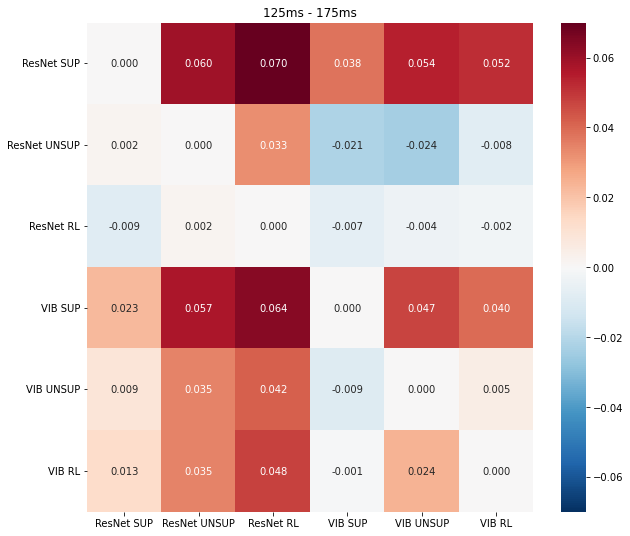

In [21]:
import seaborn as sb
s = sb.heatmap(df_win4, cmap = "RdBu_r", annot = True, fmt = ".3f", vmin = -0.07, vmax = 0.07)
s.tick_params(axis = 'x', rotation = 0)
plt.gcf().set_size_inches(10, 9)
plt.title('125ms - 175ms')
plt.show()

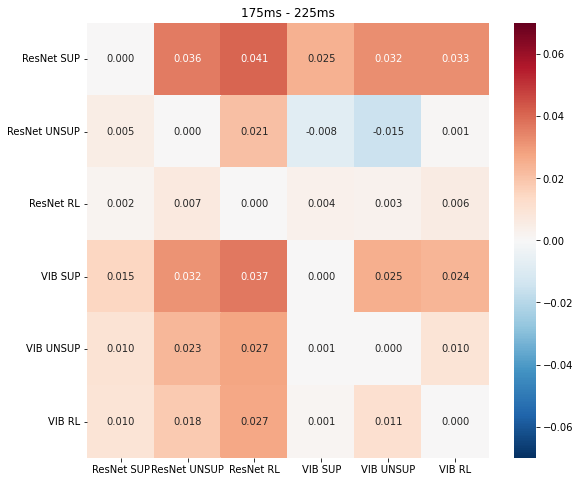

In [22]:
df_win5 = pd.DataFrame(combined_avg_tau_matrices[1])
df_win5 = df_win5.set_axis(['ResNet SUP', 'ResNet UNSUP', 'ResNet RL', 'VIB SUP', 'VIB UNSUP', 'VIB RL'])
df_win5.columns = ['ResNet SUP', 'ResNet UNSUP', 'ResNet RL', 'VIB SUP', 'VIB UNSUP', 'VIB RL']

import seaborn as sb
s = sb.heatmap(df_win5, cmap = "RdBu_r", annot = True, fmt = ".3f", vmin = -0.07, vmax = 0.07)
s.tick_params(axis = 'x', rotation = 0)
plt.gcf().set_size_inches(9, 8)
plt.title('175ms - 225ms')
plt.show()

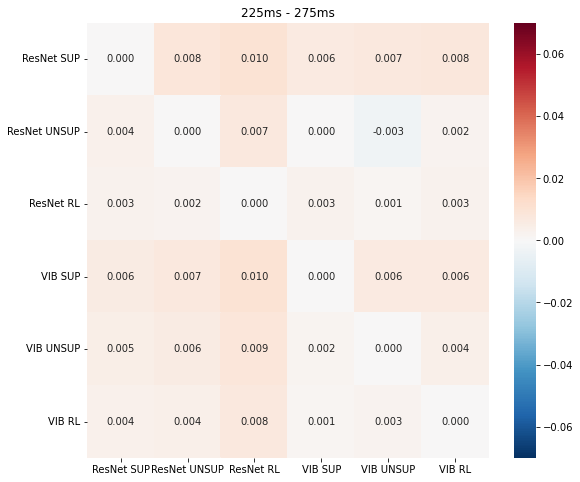

In [23]:
df_win6 = pd.DataFrame(combined_avg_tau_matrices[2])
df_win6 = df_win6.set_axis(['ResNet SUP', 'ResNet UNSUP', 'ResNet RL', 'VIB SUP', 'VIB UNSUP', 'VIB RL'])
df_win6.columns = ['ResNet SUP', 'ResNet UNSUP', 'ResNet RL', 'VIB SUP', 'VIB UNSUP', 'VIB RL']

import seaborn as sb
s = sb.heatmap(df_win6, cmap = "RdBu_r", annot = True, fmt = ".3f", vmin = -0.07, vmax = 0.07)
s.tick_params(axis = 'x', rotation = 0)
plt.gcf().set_size_inches(9, 8)
plt.title('225ms - 275ms')
plt.show()